# Mercedes-Benz Greener Manufacturing.

In [1]:
# Importing the required data libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from xgboost import XGBRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import math
from sklearn.metrics import mean_squared_error,r2_score

Importing Data Sets

In [2]:
# 1 Training data set train.csv
df_train = pd.read_csv('train.csv')
# 2 Test Data set test.csv
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
# Checking for Null Values, Data Types
print('Shape of Train data set ', df_train.shape)
print('\n Non Null values ', df_train.isnull().sum().agg("count"), '\n We can see that there are no null values')
dtype_df = df_train.dtypes.reset_index()
dtype_df.columns = ["feature name","dtypes"]
print('\n\nData Types in the data set \n', dtype_df.groupby("dtypes").agg("count").reset_index())

# Checking for Null Values, Data Types
print('\n \n Shape of Test data set ', df_test.shape)
print('Non Null values ', df_test.isnull().sum().agg("count"), '\n We can see that there are no null values')
dtype_df = df_test.dtypes.reset_index()
dtype_df.columns = ["feature name","dtypes"]
print('\n\nData Types in the data set \n', dtype_df.groupby("dtypes").agg("count").reset_index(),'\n \n')


Shape of Train data set  (4209, 378)

 Non Null values  378 
 We can see that there are no null values


Data Types in the data set 
     dtypes  feature name
0    int64           369
1  float64             1
2   object             8

 
 Shape of Test data set  (4209, 377)
Non Null values  377 
 We can see that there are no null values


Data Types in the data set 
    dtypes  feature name
0   int64           369
1  object             8 
 



Droping columns with zero variance from "train" data sets and objects columns

In [6]:
clean_data_train = pd.DataFrame(df_train[df_train.drop(df_train.columns[df_train.dtypes == 'object'],axis = 1).columns[df_train.var()!=0]])
print("Train Data set shape after dropping objects columns and columns with zero variance \n",clean_data_train.shape)

Train Data set shape after dropping objects columns and columns with zero variance 
 (4209, 358)


In [7]:
clean_data_train.head(3)

,ID,y,X10,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


Droping the same columns from "test" data sets and objects columns

In [8]:
df_train_columns_with_0_variance = pd.DataFrame(df_train[df_train.drop(df_train.columns[df_train.dtypes == 'object'],axis = 1).columns[df_train.var()==0]])
df_train_columns_with_0_variance = df_train_columns_with_0_variance.columns
clean_data_test = pd.DataFrame(df_test.drop(df_train_columns_with_0_variance,axis=1))
clean_data_test = pd.DataFrame(clean_data_test.drop(df_test.columns[df_test.dtypes == 'object'],axis = 1))
print("Test Data set shape after dropping objects columns and columns with zero variance \n",clean_data_test.shape)

Test Data set shape after dropping objects columns and columns with zero variance 
 (4209, 357)


In [9]:
clean_data_test.head(3)

,ID,X10,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,3,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Creating Features and Labels and dropping ID column

In [10]:
Label_train = clean_data_train.filter(["y"])
Features_train = clean_data_train.drop(columns=['ID',"y"],axis =1)
Features_test  = clean_data_test.drop(columns=['ID'],axis =1)

Features Information on Train Data set

In [11]:
print("Feature Train Data set shape", Features_train.shape)
dtype_df = Features_train.dtypes.reset_index()
dtype_df.columns = ["feature name","dtypes"]
print("Data Types in Feature Train Data", dtype_df.groupby("dtypes").agg("count").reset_index())
Features_train.head()

Feature Train Data set shape (4209, 356)
Data Types in Feature Train Data   dtypes  feature name
0  int64           356


,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Features Information on Test Data set

In [12]:
print("Feature Train Data set shape", Features_test.shape)
dtype_df = Features_test.dtypes.reset_index()
dtype_df.columns = ["feature name","dtypes"]
print("Data Types in Feature Train Data", dtype_df.groupby("dtypes").agg("count").reset_index())
Features_test.head()

Feature Train Data set shape (4209, 356)
Data Types in Feature Train Data   dtypes  feature name
0  int64           356


,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


Label Information of Train Data set

Feature Train Data set shape (4209, 1)
Data Types in Feature Train Data     dtypes  feature name
0  float64             1


C:\Users\nkhg\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


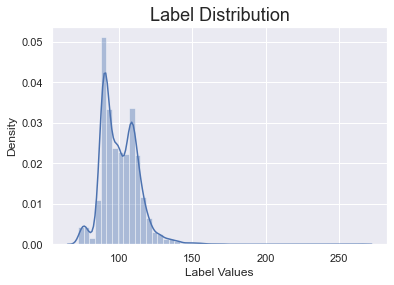

In [13]:
print("Feature Train Data set shape", Label_train.shape)
dtype_df = Label_train.dtypes.reset_index()
dtype_df.columns = ["feature name","dtypes"]
print("Data Types in Feature Train Data", dtype_df.groupby("dtypes").agg("count").reset_index())

# Plotting Label Datas
sns.set(color_codes=True)
sns.distplot(Label_train)
plt.xlabel("Label Values")
plt.title("Label Distribution", fontsize =18)
plt.show()

Splitting the Train Features in to x_train, x_validation and Train Label into y_train and y_validation for model creation

In [14]:
x_train,x_validation,y_train,y_validation = train_test_split(Features_train,Label_train,shuffle=False)
print('shape of x_train',x_train.shape)
print('shape of y_train',y_train.shape)
print('shape of x_validation',x_validation.shape)
print('shape of y_validation',y_validation.shape)

shape of x_train (3156, 356)
shape of y_train (3156, 1)
shape of x_validation (1053, 356)
shape of y_validation (1053, 1)


In [15]:
x_train.head(2)

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [16]:
y_train.head(2)

,y
0,130.81
1,88.53


In [17]:
x_validation.head(2)

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
3156,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3157,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [18]:
y_validation.head(2)

,y
3156,91.07
3157,108.73


# Scaling on data set features 

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
scaler.fit(Features_test)

StandardScaler()

# PCA Transformation on data set features  

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=.95)
pca.fit(x_train)
pca.fit(Features_test)

print('Number of columns required are' , pca.n_components_)

Number of columns required are 72


# Label Encoding on Catagorical features

On Train data set

In [21]:
df_train.columns.to_series().groupby(df_train.dtypes).groups
df_obj_train = df_train.select_dtypes(include=[object])
label_encoder = LabelEncoder()
for category in df_obj_train:
    label_encoder.fit(df_obj_train[category])
    # print(label_encoder.classes_)
    df_obj_train[category] = label_encoder.transform(df_obj_train[category])
df_obj_train.head()

<ipython-input-21-9322d1319c14>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obj_train[category] = label_encoder.transform(df_obj_train[category])


,X0,X1,X2,X3,X4,X5,X6,X8
0,32,23,17,0,3,24,9,14
1,32,21,19,4,3,28,11,14
2,20,24,34,2,3,27,9,23
3,20,21,34,5,3,27,11,4
4,20,23,34,5,3,12,3,13


On Test data set

In [22]:
df_test.columns.to_series().groupby(df_test.dtypes).groups
df_obj_test = df_test.select_dtypes(include=[object])
label_encoder = LabelEncoder()
for category in df_obj_test:
    label_encoder.fit(df_obj_test[category])
    # print(label_encoder.classes_)
    df_obj_test[category] = label_encoder.transform(df_obj_test[category])
df_obj_test.head()

<ipython-input-22-be418b111e75>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obj_test[category] = label_encoder.transform(df_obj_test[category])


,X0,X1,X2,X3,X4,X5,X6,X8
0,21,23,34,5,3,26,0,22
1,42,3,8,0,3,9,6,24
2,21,23,17,5,3,0,9,9
3,21,13,34,5,3,31,11,13
4,45,20,17,2,3,30,8,12


# Transforming Scaler on x_train and x_validation, Features_test

In [23]:
x_train = scaler.transform(x_train)
x_validation = scaler.transform(x_validation)
Features_test = scaler.transform(Features_test)


# Transforming PCA on x_train and x_validation, Features_test

In [24]:
x_train = pca.transform(x_train)
x_validation = pca.transform(x_validation)
Features_test = pca.transform(Features_test)

# Concatinating Catagorical and Contineous Data 

In [25]:
x_tr = np.concatenate([df_obj_train[:3156],x_train], axis = 1)
x_vl = np.concatenate([df_obj_train[3156:],x_validation], axis = 1)
Features_test = np.concatenate([df_obj_test,Features_test], axis = 1)
y_tr = y_train
y_vl = y_validation

In [26]:
Regre= []
RMSE_S = []
R2 = []

# LinearRegression   

In [27]:
lr = LinearRegression()
lr.fit(x_tr, y_tr)
pred_test = lr.predict(x_vl)
r_square = lr.score(x_vl,y_vl)
RMSE = math.sqrt(mean_squared_error(y_vl,pred_test))
print('\n \n *------------Linear Regression Values--------------------*')
print('Average R_Square for Linear Regreesion model =',r_square)
print('Average MSE for Linear Regreesion model =',RMSE)
Regre.append('Linear Reg')
RMSE_S.append(RMSE)
R2.append(r_square)


 
 *------------Linear Regression Values--------------------*
Average R_Square for Linear Regreesion model = 0.5710445953168743
Average MSE for Linear Regreesion model = 7.565278499567792


Plotting the data for the first 50 y validation and Predicted Scores

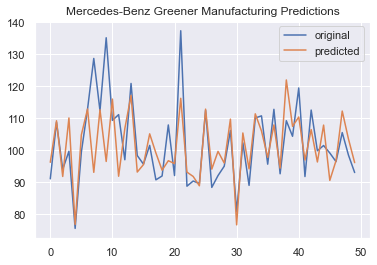

In [28]:
x_ax = range(len(y_vl[:50]))
plt.plot(x_ax, y_vl[:50], label="original")
plt.plot(x_ax, pred_test[:50], label="predicted")
plt.title("Mercedes-Benz Greener Manufacturing Predictions")
plt.legend()
plt.show()

# Ridge Regression 

In [29]:
ridreg = Ridge(max_iter=1000)
ridreg.fit(x_tr, y_tr)
pred_test = ridreg.predict(x_vl)
RMSE = math.sqrt(mean_squared_error(y_vl,pred_test))
r_square =  r2_score(y_vl, pred_test)
print('\n \n *------------Ridge Regression Values--------------------*')
print('Average R_Square for Linear Regreesion model =',r_square)
print('Average MSE for Linear Regreesion model =',RMSE)
Regre.append('Ridge Reg')
RMSE_S.append(RMSE)
R2.append(r_square)




 
 *------------Ridge Regression Values--------------------*
Average R_Square for Linear Regreesion model = 0.5710745735948679
Average MSE for Linear Regreesion model = 7.565014138771667


Plotting the data for the first 50 y validation and Predicted Scores

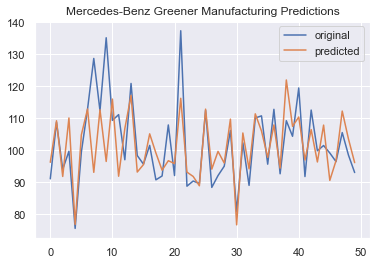

In [30]:
x_ax = range(len(y_vl[:50]))
plt.plot(x_ax, y_vl[:50], label="original")
plt.plot(x_ax, pred_test[:50], label="predicted")
plt.title("Mercedes-Benz Greener Manufacturing Predictions")
plt.legend()
plt.show()

# Lasso Regression 

In [31]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.001,max_iter=1000)
lasso.fit(x_tr, y_tr)
pred_test = lasso.predict(x_vl)
RMSE = math.sqrt(mean_squared_error(y_vl,pred_test))
r_square =  r2_score(y_vl, pred_test)
print('\n \n *------------Lasso Regression Values--------------------*')
print('Average R_Square for Linear Regreesion model =',r_square)
print('Average MSE for Linear Regreesion model =',RMSE)
Regre.append('Lasso Reg')
RMSE_S.append(RMSE)
R2.append(r_square)




 
 *------------Lasso Regression Values--------------------*
Average R_Square for Linear Regreesion model = 0.5712013046991642
Average MSE for Linear Regreesion model = 7.56389646963415


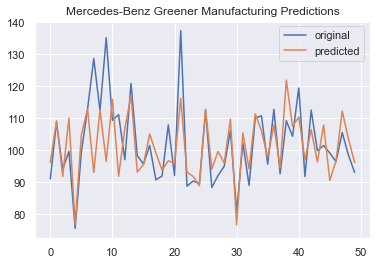

In [32]:
x_ax = range(len(y_vl[:50]))
plt.plot(x_ax, y_vl[:50], label="original")
plt.plot(x_ax, pred_test[:50], label="predicted")
plt.title("Mercedes-Benz Greener Manufacturing Predictions")
plt.legend()
plt.show()

Plotting the data for the first 50 y validation and Predicted Scores

# XGBRegressor

In [33]:
from xgboost import XGBRegressor
xg_reg = XGBRegressor(learning_rate=.5,max_depth = 5, alpha = 100, n_estimators =10)
xg_reg.fit(x_tr,y_tr)
pred_test = xg_reg.predict(x_vl)
RMSE = math.sqrt(mean_squared_error(y_vl,pred_test))
r_square =  r2_score(y_vl, pred_test)
print('\n \n *------------XGBRegressor Regression Values(with out parameter Tuning)--------------------*')
print('Average R_Square for Linear Regreesion model =',r_square)
print('Average MSE for Linear Regreesion model =',RMSE)
Regre.append('XGBRegressor Reg (with out parameter Tuning)')
RMSE_S.append(RMSE)
R2.append(r_square)




 
 *------------XGBRegressor Regression Values(with out parameter Tuning)--------------------*
Average R_Square for Linear Regreesion model = 0.5103188149584696
Average MSE for Linear Regreesion model = 8.083055428940613


Plotting the data for the first 50 y validation and Predicted Scores

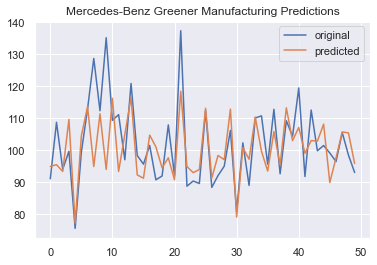

In [34]:
x_ax = range(len(y_vl[:50]))
plt.plot(x_ax, y_vl[:50], label="original")
plt.plot(x_ax, pred_test[:50], label="predicted")
plt.title("Mercedes-Benz Greener Manufacturing Predictions")
plt.legend()
plt.show()

In [35]:
xg_reg1 = XGBRegressor(alpha=100, base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.5, max_delta_step=0, max_depth=3,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=12, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=100, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
xg_reg1.fit(x_tr,y_tr)
pred_test_Parameter_tuned= xg_reg1.predict(x_vl)
RMSE = math.sqrt(mean_squared_error(y_vl,pred_test_Parameter_tuned))
r_square =  r2_score(y_vl, pred_test_Parameter_tuned)
print('\n \n *------------XGBRegressor Regression Values--------------------*')
print('Average R_Square for Linear Regreesion model =',r_square)
print('Average MSE for Linear Regreesion model =',RMSE)
Regre.append('XGBRegressor Reg (with parameter Tuning)')
RMSE_S.append(RMSE)
R2.append(r_square)


 
 *------------XGBRegressor Regression Values--------------------*
Average R_Square for Linear Regreesion model = 0.5503880842397002
Average MSE for Linear Regreesion model = 7.745291269146756


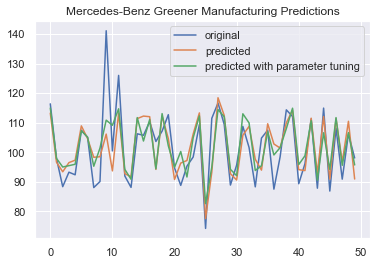

In [36]:
x_ax = range(len(y_vl[50:100]))
plt.plot(x_ax, y_vl[50:100], label="original")
plt.plot(x_ax, pred_test[50:100], label="predicted")
plt.plot(x_ax, pred_test_Parameter_tuned[50:100], label="predicted with parameter tuning")
plt.title("Mercedes-Benz Greener Manufacturing Predictions")
plt.legend()
plt.show()

In [37]:
Results= pd.DataFrame(list(zip(Regre, RMSE_S,R2)),
               columns =['Regression Type','RMSE Score', 'R Squared score'])
Results

,Regression Type,RMSE Score,R Squared score
0,Linear Reg,7.565278,0.571045
1,Ridge Reg,7.565014,0.571075
2,Lasso Reg,7.563896,0.571201
3,XGBRegressor Reg (with out parameter Tuning),8.083055,0.510319
4,XGBRegressor Reg (with parameter Tuning),7.745291,0.550388


# Saving The data File Features_test

In [38]:
Features_test1 = pd.DataFrame(Features_test)
Features_test1.to_csv('Feature_Engineered_test.csv')


# Prediction on Features_test

In [39]:
pred_on_Features_test = xg_reg1.predict(Features_test1)

In [40]:
# Saving Predicted Results for Features_test
Results_of_Features_test = pd.DataFrame(pred_on_Features_test)
Results_of_Features_test.to_csv('Final_Results.csv')

# ################### THE END ################## #